# Notebook 01 — Exploratory Data Analysis (EDA)

Goal: understand the Breast Cancer dataset structure, target distribution, and basic feature statistics before training models.

What we do in this notebook
- Load the dataset and build a clean pandas DataFrame
- Inspect shapes and class balance
- Review summary statistics for the numeric features
- Create a stratified train and test split

Key outputs
- Class distribution plot
- Summary statistics table
- Train and test split sizes



## Setup

Import the libraries used across the project and set a random seed for reproducibility.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Reproducibility
SEED = 42
np.random.seed(SEED)



## Dataset overview

Load the Breast Cancer dataset, create feature and target objects, and print basic metadata.



In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 0/1 in sklearn
target_names = data.target_names  # e.g., ['malignant', 'benign']

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Target names:", target_names)



X shape: (569, 30)
y shape: (569,)
Target names: ['malignant' 'benign']


## Target distribution

Check class balance and visualize the number of samples per class.




Class counts:
 target
0    212
1    357
Name: count, dtype: int64


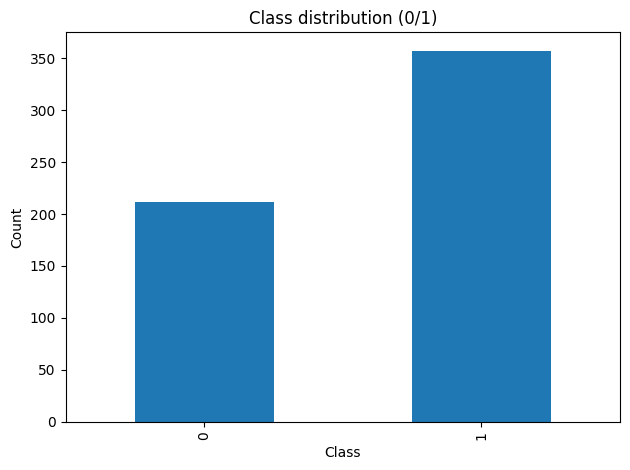

In [3]:
# Class distribution
class_counts = y.value_counts().sort_index()
print("\nClass counts:\n", class_counts)

plt.figure()
class_counts.plot(kind="bar")
plt.title("Class distribution (0/1)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



## Summary statistics and data split

Review basic descriptive statistics and create a stratified train and test split to preserve class proportions.



In [4]:
# Basic stats
display(X.describe().T.head(10))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

print("\nTrain:", X_train.shape, "Test:", X_test.shape)

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
mean compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
mean concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
mean concave points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
mean symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744



Train: (455, 30) Test: (114, 30)
